/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 130ms/step - accuracy: 0.2766 - loss: 1.9018 - val_accuracy: 0.4703 - val_loss: 1.4382
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 130ms/step - accuracy: 0.4907 - loss: 1.4007 - val_accuracy: 0.5250 - val_loss: 1.3330
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 133ms/step - accuracy: 0.5668 - loss: 1.2128 - val_accuracy: 0.6161 - val_loss: 1.0945
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 260s 132ms/step - accuracy: 0.6134 - loss: 1.1116 - val_accuracy: 0.6393 - val_loss: 1.0429
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 259s 130ms/step - accuracy: 0.6402 - loss: 1.0292 - val_accuracy: 0.6459 - val_loss: 0.9990
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 265s 132ms/step - accuracy: 0.6648 - loss: 0.9637 - val_accuracy: 0.6754 - val_loss: 0.9467
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 128ms/step - accuracy: 0.6850 - loss: 0.9187 - val_accuracy: 0.6858 - val_loss: 0.9070
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 206s 131ms/step - ac

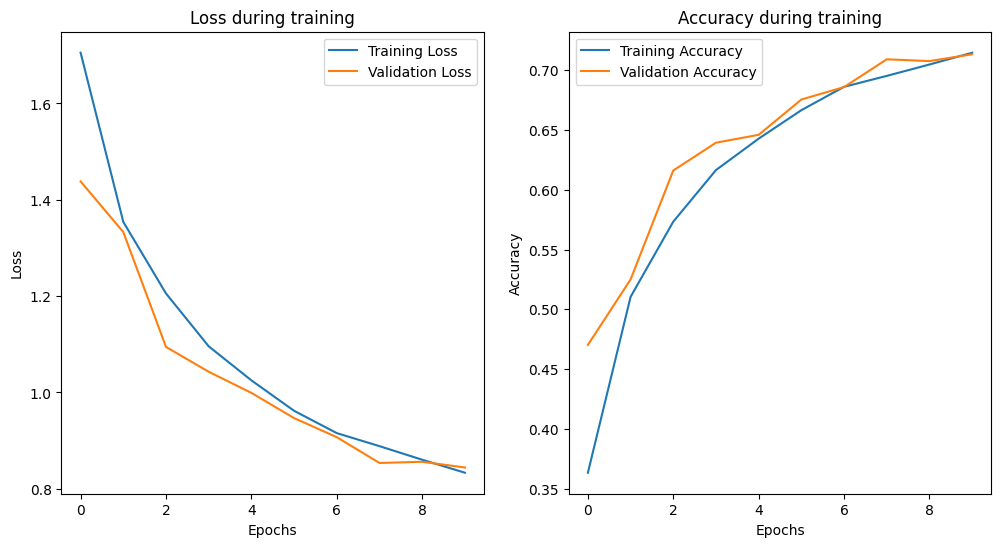

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the dataset (e.g., CIFAR-10)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Dropout(0.2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Remove one max pooling layer here to prevent dimension collapse
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

# Predict the first 4 images
predictions = model.predict(x_test[:4])
for i, prediction in enumerate(predictions):
    print(f"Predicted label for image {i+1}: {prediction.argmax()} (Actual label: {y_test[i][0]})")

# Visualizing the loss and accuracy using the history object
plt.figure(figsize=(12, 6))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
